## Introduction

This notebook contains code on a simple linear regression problem.

### Data
The data used in this simple illustration contains information about 1559 products accross 10 different BigMart stores in different cities. The aim is to build a model that will predict the sales of each product at an outlet.

The data is in a CSV file and it includes columns such as: 
1. Item_Identifier - Unique product ID.
2. Item_Weight - Weight of product.
3. Item_Fat_Content - Whether the product is low fat or not.
4. Item_Visibility - The percentage of the total display area of all products.
5. Item_Type - The category to which the product belongs.
6. Item_MRP - Maximum Retail Price (list price) of the product.
7. Outlet_Identifier - Unique store ID
8. Outlet_Establishment_Year - The year in which the store was established.
9. Outlet_Size - The size of the store in terms of ground area covered.
10. Outlet_Location_Type - The type of city in which the store is located.
11. Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket.
12. Item_Outlet_Sales - Sales of the product in t particular store. This is the outcome variable to be predicted.

There are 8523 rows of data in the data dataset and 5681 rows of data in the test data set. Here is a link to the [data](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets).

We will use this data to predict the sales of each product at an outlet.

In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load data into pandas dataframe
data = pd.read_csv('data/regression/train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


#### Data Visualization

In [5]:
#Categorical columns in the data dataset
categorical = data.select_dtypes(exclude='number').columns.to_list()
print('Categorical Columns')
print('-----------------------------')
print(*categorical, sep = "\n")

Categorical Columns
-----------------------------
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [6]:
item_info = ['Item_Fat_Content', 'Item_Type']
outlet_info = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [7]:
for col in item_info:
    print(col)
    print('-----------------------------')
    print(data[col].value_counts())
    print('\n')

Item_Fat_Content
-----------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
-----------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64




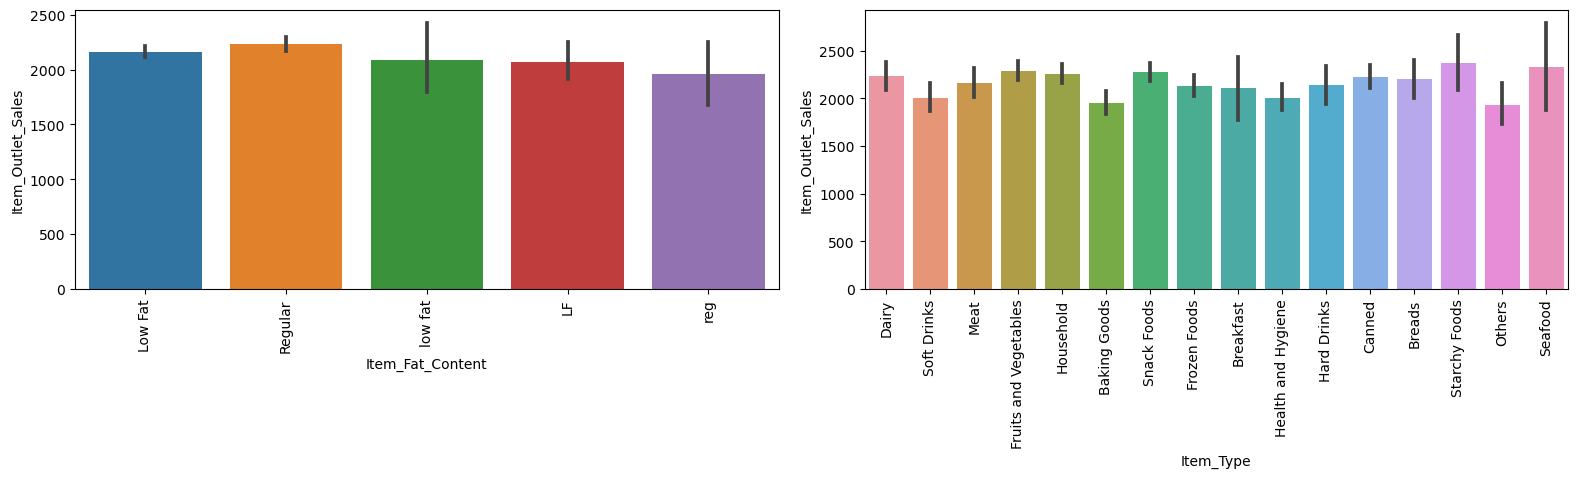

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.subplots_adjust(hspace=0.200, wspace=0.125)

#Item Sales Information
for i, column in enumerate(item_info):
    sns.barplot( x=data[column], y = 'Item_Outlet_Sales', data=data, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout(pad=1.5)
plt.show()

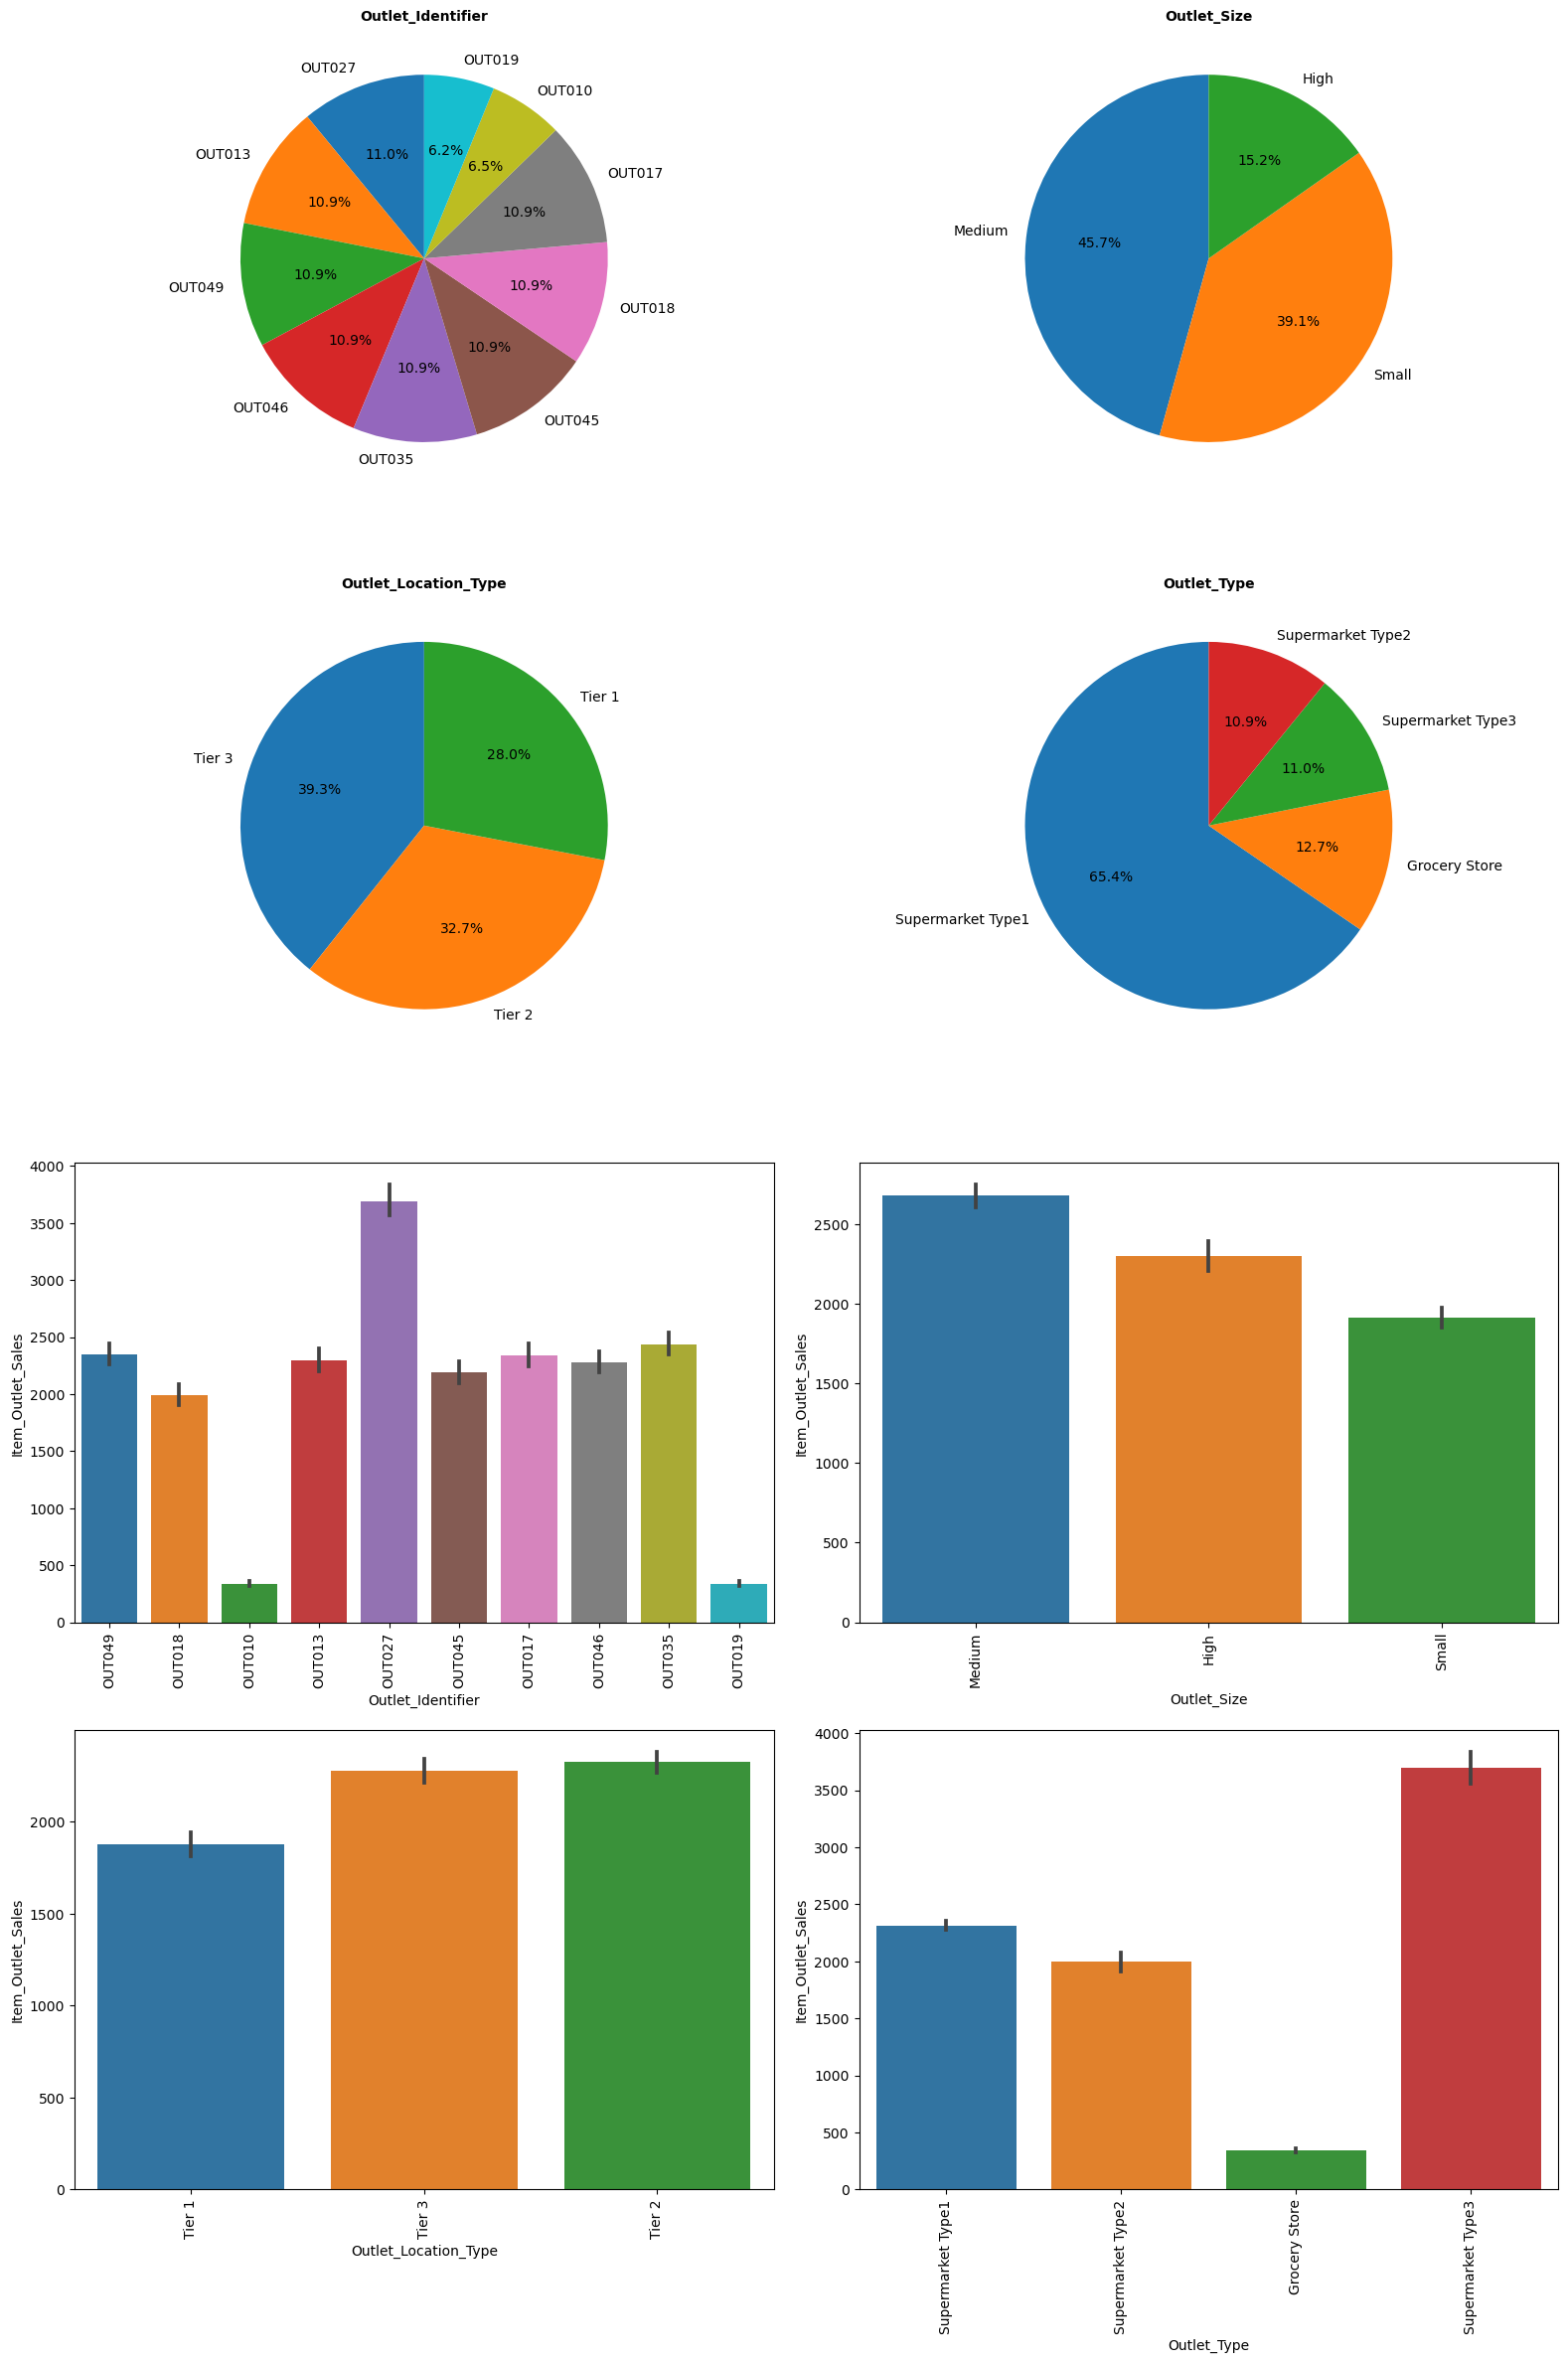

In [9]:
def create_pie_subplot(column_data, column_name, row, column):
    counts = column_data.value_counts()
    axes[row, column].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[row, column].set_title(column_name, fontdict={'size':10, 'weight':'bold', 'color':'black'})

def create_bar_subplot(x_column, row, column):
    sns.barplot( x=x_column, y = 'Item_Outlet_Sales', data=data, ax=axes[r, c])
    axes[row, column].set_xticklabels(axes[r, c].get_xticklabels(), rotation=90)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.200, wspace=0.125)

#Outlet Information
k = 0 
for r in range(2):
    for c in range(2):
        create_pie_subplot(data[outlet_info[k]], outlet_info[k], r, c)
        k += 1

#Outlet Sales Information
k = 0 
for r in range(2, 4):
    for c in range(2):
        create_bar_subplot(data[outlet_info[k]], r, c)
        k += 1

plt.tight_layout(pad=1.5)
plt.show()

#### Data Cleaning

In [10]:
#check for null values in data dataset
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 null values in 'Item_Weight' column and 2410 in 'Outlet_Size' column of the test dataset. The missing valuees will be replaced using Random Sampling method.

In [11]:
#Replace null values in 'Item_Weight' with random values
def fill_column_with_random(df, column_name):
    column = df[column_name]
    missing_indices = column.index[column.isnull()]
    random_values = np.random.choice(column.dropna(), size=len(missing_indices), replace=True)
    df.loc[missing_indices, column_name] = random_values

    return df

data = fill_column_with_random(data, 'Item_Weight')
data = fill_column_with_random(data, 'Outlet_Size')
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#Duplicate rows in data dataset
data.duplicated().any()

False

There are no duplicate rows in the data set.

In [13]:
#Numerical columns in the data dataset
numerical = data.select_dtypes(include='number').columns.to_list()
print(*numerical, sep = "\n")

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


Let's check for outliers in 'Item_Weight', 'Item_Visibility', 'Item_MRP' columns.

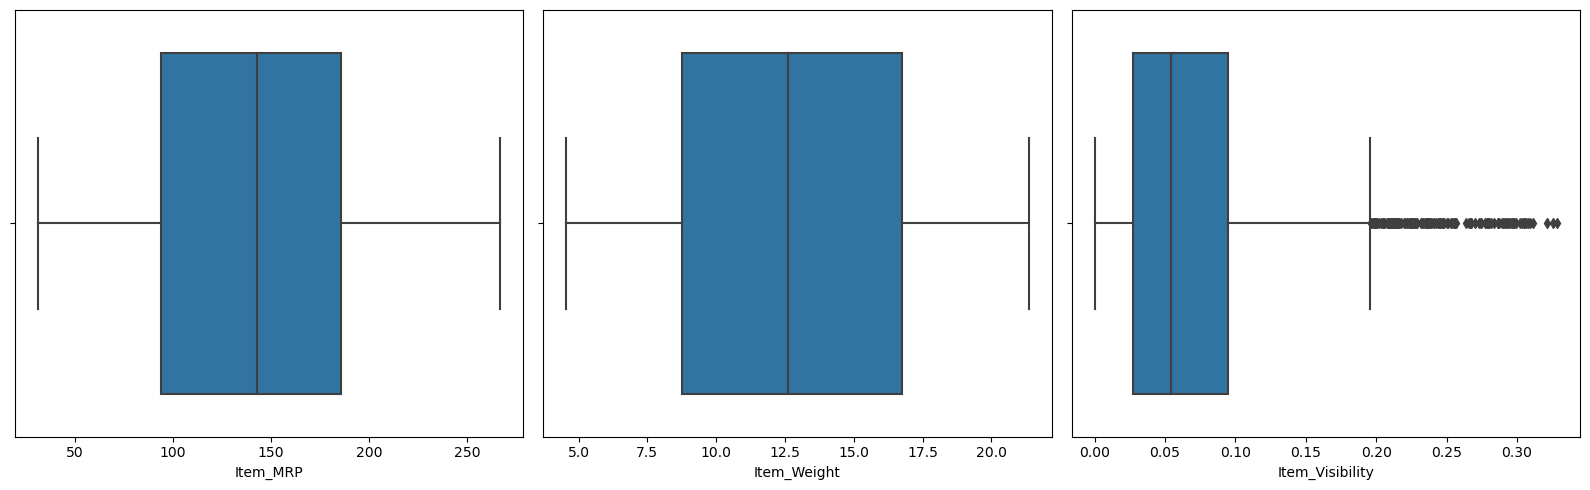

In [14]:

cols = ['Item_MRP', 'Item_Weight', 'Item_Visibility']
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for i, col in enumerate(cols):
    sns.boxplot(x=col, data=data, ax=axis[i])

fig.tight_layout()
plt.show()

There are outliers in 'Item_Visibility' column. The outliers will be removed using Interquartile Range (IQR) method.

In [15]:
q1 = np.percentile(data['Item_Visibility'], 25)
q3 = np.percentile(data['Item_Visibility'], 75)

# Calculate IQR
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count data points outside the bounds
outside_bounds = (data['Item_Visibility'] < lower_bound) | (data['Item_Visibility'] > upper_bound)
percentage = np.mean(outside_bounds) * 100

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Percentage of data in 'Item_Visibility' column outside IQR: {percentage:.2f}%")


Lower bound: -0.07440424500000001
Upper bound: 0.195979015
Percentage of data in 'Item_Visibility' column outside IQR: 1.69%


In [16]:
# Drop rows outside the bounds
data = data[(data['Item_Visibility'] >= lower_bound) & (data['Item_Visibility'] <= upper_bound)]

<AxesSubplot: xlabel='Item_Visibility'>

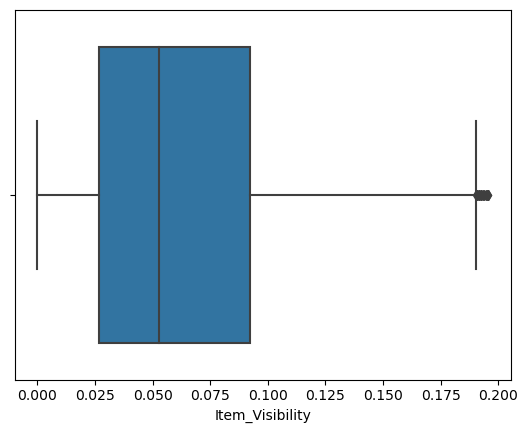

In [17]:
sns.boxplot(x=data['Item_Visibility'])

<AxesSubplot: >

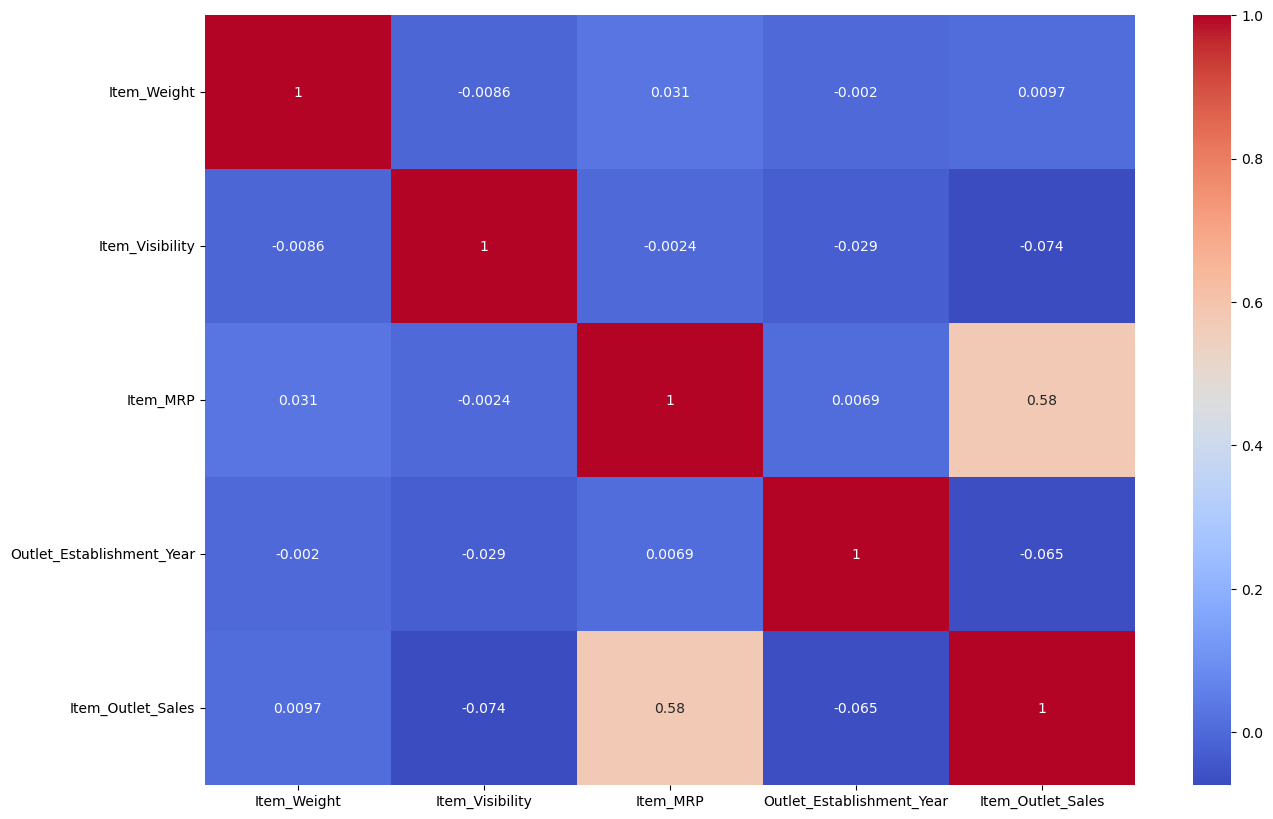

In [18]:
#check correlation of features in the dataset
plt.figure(figsize = (15, 10))
sns.heatmap(data = data.corr(), annot = True, cmap='coolwarm')

In [19]:
#Encode categorical columns.
for col in data.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col] = label_encoder.transform(data[col])
    print(f"{col}: {data[col].unique()}")

Item_Identifier: [ 156    8  662 ... 1323 1524 1519]
Item_Fat_Content: [1 2 3 0 4]
Item_Type: [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier: [9 3 0 1 5 7 2 8 6 4]
Outlet_Size: [1 2 0]
Outlet_Location_Type: [0 2 1]
Outlet_Type: [1 2 0 3]


In [20]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Model Training

The model will be trained using Linear Regression and the evaluation metrics to evaluate the model are:
1.  Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. R-squared (R^2)

In [21]:
#Split data for training and testing
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Initialize and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = reg_model.predict(X_test)

#Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 880.9927083632056
MSE: 1384003.0185361279
RMSE: 1176.4365765038624
R-squared: 0.5116624625420889
